In [19]:
import pandas as pd
import numpy as np
# pd.set_option...Para ver todas las columnas y decimales de 4 dígitos
pd.set_option('display.max_columns',None)
pd.set_option('display.float_format', lambda x : '%.4f' % x)
import sys
sys.path.append('..')
from SRC import sp_limpieza as sl
from SRC import sp_visual as sv
from SRC import sp_nulos_num as snulos
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [20]:
df=pd.read_csv("../Data/mktgeda_datos_limpios.csv")

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209915 entries, 0 to 209914
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   campaign_id       209915 non-null  int64  
 1   company           209915 non-null  object 
 2   campaign_type     209915 non-null  object 
 3   duration          191309 non-null  float64
 4   channel_used      209915 non-null  object 
 5   conversion_rate   200471 non-null  float64
 6   roi               173439 non-null  float64
 7   location          209915 non-null  object 
 8   language          209915 non-null  object 
 9   clicks            178736 non-null  float64
 10  impressions       188467 non-null  float64
 11  engagement_score  186051 non-null  float64
 12  customer_segment  209915 non-null  object 
 13  date              209915 non-null  object 
 14  total($)          201832 non-null  float64
 15  genre             209915 non-null  object 
 16  ages              20

In [22]:
columnas_num=df.select_dtypes(include=np.number).columns.tolist()
lista_eliminar=['campaign_id','year', 'month','quarter']
for col in lista_eliminar:
  columnas_num.remove(col)
columnas_num

['duration',
 'conversion_rate',
 'roi',
 'clicks',
 'impressions',
 'engagement_score',
 'total($)']

In [23]:
df[columnas_num].describe().T.round(4)

,count,mean,std,min,25%,50%,75%,max
duration,191309.0000,37.5035,16.7443,15.0000,30.0000,30.0000,45.0000,60.0000
conversion_rate,200471.0000,0.0808,0.0410,0.0100,0.0500,0.0808,0.1200,0.1515
roi,173439.0000,27.5304,26.1923,2.0000,5.0100,8.0000,55.0000,88.0000
clicks,178736.0000,280253.2882,399127.9838,100.0000,552.0000,101101.0000,548548.0000,10001000.0000
impressions,188467.0000,27614356.6920,34140998.4982,1000.0000,5508.0000,9996.0000,55235523.0000,1000010000.0000
engagement_score,186051.0000,77.9064,215.8253,1.0000,5.0000,10.0000,66.0000,1010.0000
total($),201832.0000,12503.9995,4338.1943,5000.0000,8740.0000,12496.0000,16261.0000,20000.0000


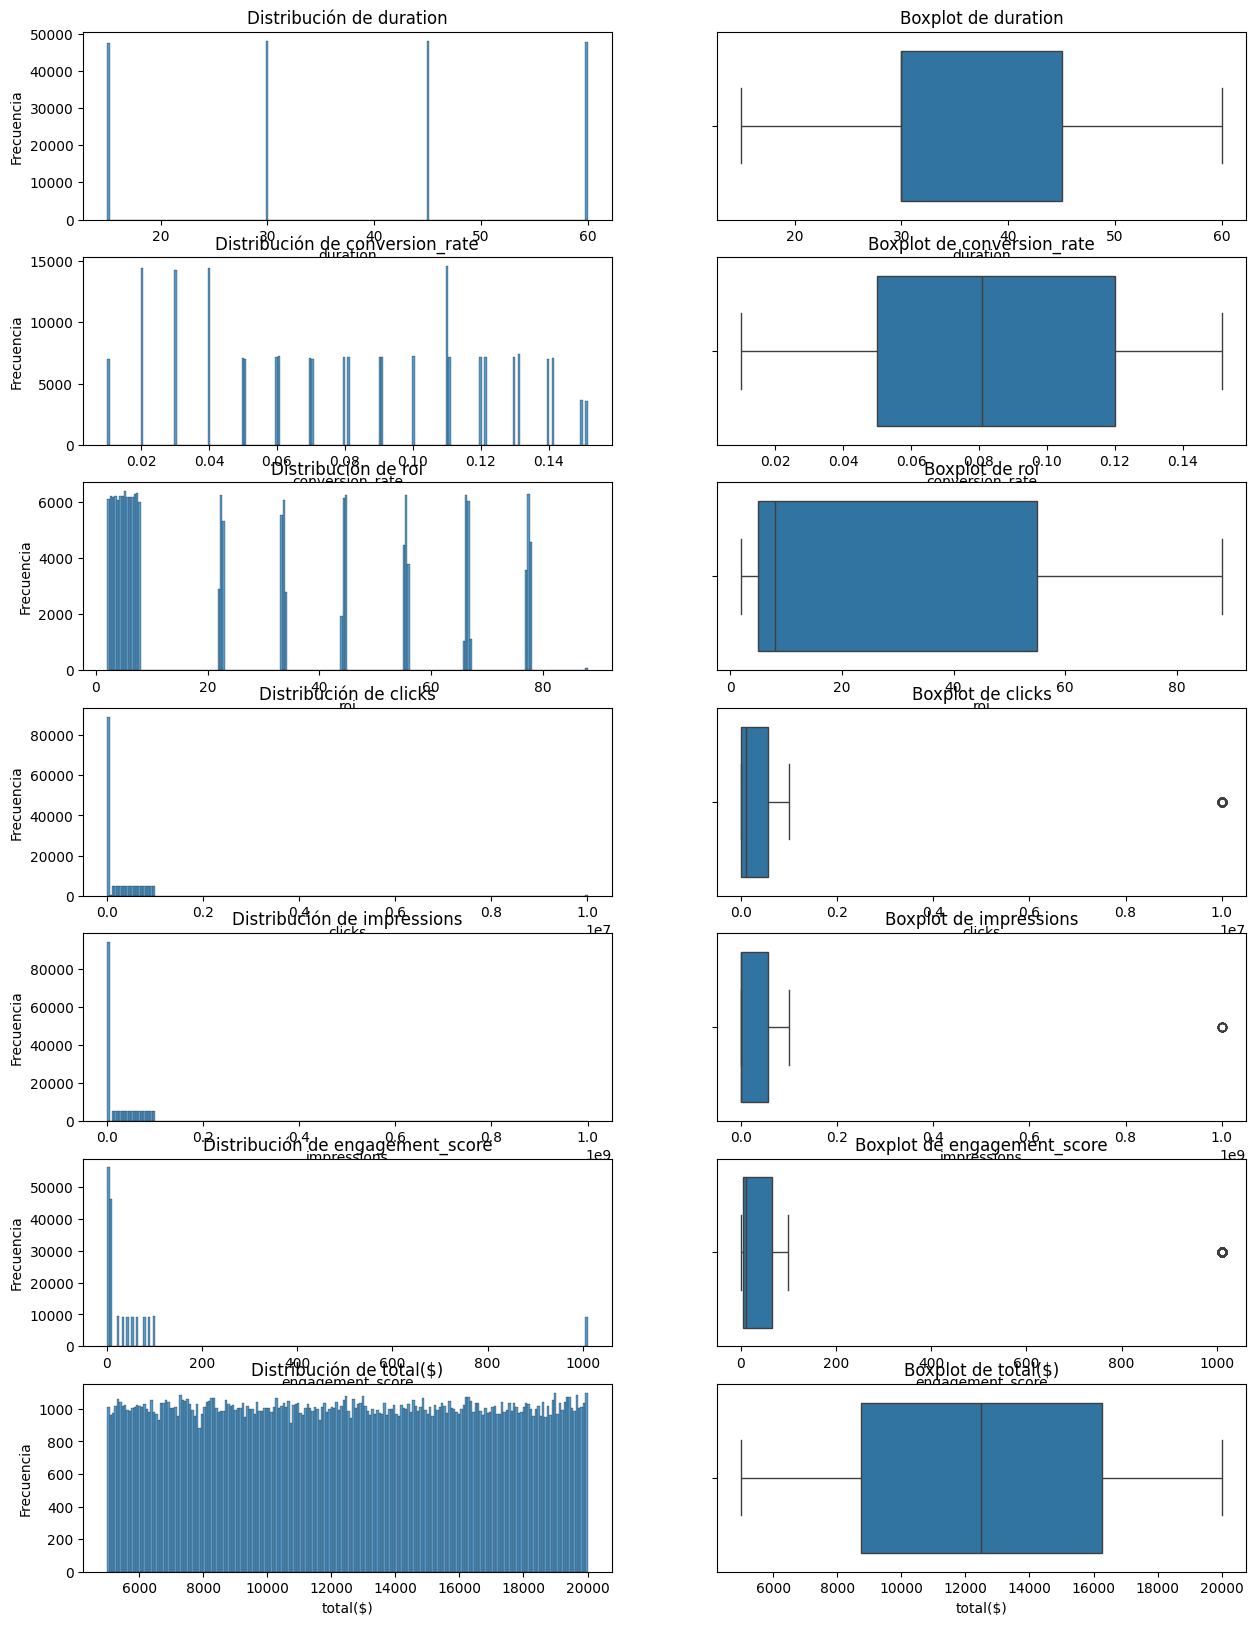

In [24]:
sv.subplot_col_num_2(df,columnas_num)

In [25]:
df['impressions'][df['impressions']>800000000].count()

np.int64(14)

In [26]:
dicc_outliers={'impressions':800000000,
               'clicks':8000000,
               'engagement_score':800}

In [27]:
for col, out in dicc_outliers.items():
  outliers=df[col][df[col]>out].count()
  print(f'Para la columna {col.upper()} tenemos {outliers} outliers, y representa {round(outliers/df.shape[0]*100,3)}% del total')

Para la columna IMPRESSIONS tenemos 14 outliers, y representa 0.007% del total
Para la columna CLICKS tenemos 95 outliers, y representa 0.045% del total
Para la columna ENGAGEMENT_SCORE tenemos 9284 outliers, y representa 4.423% del total


In [28]:
df['clicks'] = df['clicks'].apply(lambda x: np.nan if x > 8000000 else x)
df['impressions'] = df['impressions'].apply(lambda x: np.nan if x > 800000000 else x)

In [29]:
snulos.calcular_solo_col_null(df)

,Column,DataType,NullCount,Null%
0,duration,float64,18606,8.8636
1,conversion_rate,float64,9444,4.4990
2,roi,float64,36476,17.3766
3,clicks,float64,31274,14.8984
4,impressions,float64,21462,10.2241
5,engagement_score,float64,23864,11.3684
6,total($),float64,8083,3.8506
7,year,float64,6908,3.2909
8,month,float64,6908,3.2909
9,quarter,float64,6908,3.2909


(['duration', 'conversion_rate', 'total($)', 'year', 'month', 'quarter'],
 ['roi', 'clicks', 'impressions', 'engagement_score'])

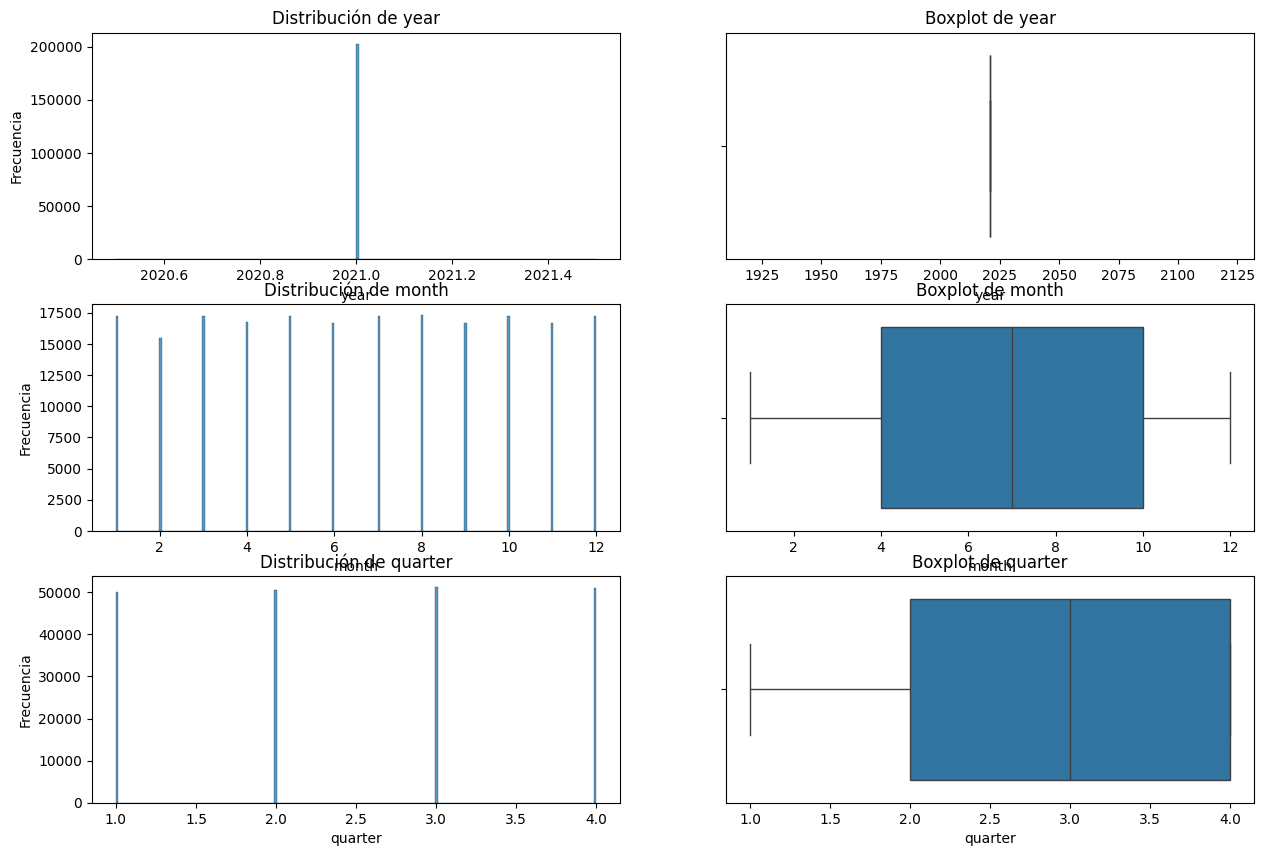

In [30]:
lista_columas_fecha=['year','month','quarter']
sv.subplot_col_num_2(df,lista_columas_fecha)

In [31]:
df[lista_columas_fecha].describe()

,year,month,quarter
count,203007.0000,203007.0000,203007.0000
mean,2021.0000,6.5275,2.5101
std,0.0000,3.4465,1.1162
min,2021.0000,1.0000,1.0000
25%,2021.0000,4.0000,2.0000
50%,2021.0000,7.0000,3.0000
75%,2021.0000,10.0000,4.0000
max,2021.0000,12.0000,4.0000


In [32]:
low_null_cols, high_null_cols=snulos.calcular_solo_col_null(df)

,Column,DataType,NullCount,Null%
0,duration,float64,18606,8.8636
1,conversion_rate,float64,9444,4.4990
2,roi,float64,36476,17.3766
3,clicks,float64,31274,14.8984
4,impressions,float64,21462,10.2241
5,engagement_score,float64,23864,11.3684
6,total($),float64,8083,3.8506
7,year,float64,6908,3.2909
8,month,float64,6908,3.2909
9,quarter,float64,6908,3.2909


In [33]:
low_null_cols

['duration', 'conversion_rate', 'total($)', 'year', 'month', 'quarter']

In [34]:
df_filled_simple=df.fillna({
  "conversion_rate": df["conversion_rate"].mean(),
  "total($)": df["total($)"].mean(),
  "year":2021,
  "month":df["month"].median(),
  "quarter": 3
})

In [35]:
df=df.fillna({
  "conversion_rate": df["conversion_rate"].mean(),
  "total($)": df["total($)"].mean(),
  "year":2021,
  "month":df["month"].median(),
  "quarter": 3
})

In [36]:
df,col_iterative=snulos.imputar_iterative(df,high_null_cols)

,count,mean,std,min,25%,50%,75%,max
roi,209915.0000,27.5299,23.8083,2.0000,5.6400,27.2068,44.3737,88.0000
clicks,209915.0000,275083.7669,304720.3894,100.0000,630.0000,256256.0000,470470.0000,999999.0000
impressions,209915.0000,27542117.2004,31359913.9309,1000.0000,6015.0000,20252025.0000,50095009.0000,99999999.0000
engagement_score,209915.0000,77.9071,203.1876,1.0000,6.0000,22.0000,77.0000,1010.0000


In [37]:
df.drop(columns=high_null_cols,inplace=True)

In [38]:
df.to_csv('../Data/mktgeda_datos_limpios.csv',index=False)